# Long Short Term Memory(LSTM) based - Stock predicition - - # CPU based


Aim -to predict the Closing_Price_Prediction using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
# import pandas_datareader as web
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_mode
# import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import Model
from keras.layers import Dense, LSTM, Dropout, Concatenate, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8-dark')

2024-05-03 23:34:24.389363: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 23:34:24.418780: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 23:34:24.876622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

In [3]:
df = []
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/AAPLStock_sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/AmazonStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/CSCOStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/IBMStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/JNJStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/JNPRStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/MSFTStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/ORCLStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/PfizerStock_Sentiment_6M.csv"))
df.append(pd.read_csv("Combining Stock and Twitter Data/MyDrive/TGTStock_Sentiment_6M.csv"))

In [4]:
df[0]

,date,open,low,high,volume,close,Name,Date,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg
0,10/2/2017,154.26,152.72,154.45,18524860,153.8100,AAPL,10/2/2017,23.960302,7.325142,68.714556,2116,41.836689,7.325142
1,10/3/2017,154.01,153.91,155.09,16146388,154.4800,AAPL,10/3/2017,37.554585,7.336245,55.109170,1145,41.825586,7.336245
2,10/4/2017,153.63,152.46,153.86,19844177,153.4508,AAPL,10/4/2017,41.138836,11.836212,47.024952,1563,41.138836,15.649430
3,10/5/2017,154.18,154.05,155.44,21032800,155.3900,AAPL,10/5/2017,39.038841,5.924951,55.036208,1519,43.236880,5.924951
4,10/6/2017,154.97,154.56,155.49,16423749,155.3000,AAPL,10/6/2017,49.426486,7.403545,43.169969,959,49.426486,15.071746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,3/5/2018,175.21,174.52,177.74,28401366,176.8200,AAPL,3/5/2018,31.710914,5.653884,62.635202,2034,43.507946,5.653884
105,3/6/2018,177.91,176.13,178.25,23788506,176.6700,AAPL,3/6/2018,49.969715,5.511811,44.518474,1651,49.969715,11.831507
106,3/7/2018,174.94,174.27,175.85,31703462,175.0300,AAPL,3/7/2018,51.392962,6.671554,41.935484,1364,51.392962,15.574240
107,3/8/2018,175.48,175.07,177.12,23163767,176.9400,AAPL,3/8/2018,50.439239,6.954612,42.606149,1366,50.439239,15.186632


In [5]:
for i in df:
    i.drop(['date', 'Name', 'Date'], axis=1, inplace= True)

In [6]:
df[0]

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg
0,154.26,152.72,154.45,18524860,153.8100,23.960302,7.325142,68.714556,2116,41.836689,7.325142
1,154.01,153.91,155.09,16146388,154.4800,37.554585,7.336245,55.109170,1145,41.825586,7.336245
2,153.63,152.46,153.86,19844177,153.4508,41.138836,11.836212,47.024952,1563,41.138836,15.649430
3,154.18,154.05,155.44,21032800,155.3900,39.038841,5.924951,55.036208,1519,43.236880,5.924951
4,154.97,154.56,155.49,16423749,155.3000,49.426486,7.403545,43.169969,959,49.426486,15.071746
...,...,...,...,...,...,...,...,...,...,...,...
104,175.21,174.52,177.74,28401366,176.8200,31.710914,5.653884,62.635202,2034,43.507946,5.653884
105,177.91,176.13,178.25,23788506,176.6700,49.969715,5.511811,44.518474,1651,49.969715,11.831507
106,174.94,174.27,175.85,31703462,175.0300,51.392962,6.671554,41.935484,1364,51.392962,15.574240
107,175.48,175.07,177.12,23163767,176.9400,50.439239,6.954612,42.606149,1366,50.439239,15.186632


In [7]:
for i in df:
    i['diff']=i['high']-i['low']
for i in df:
    i['exp']=(i['open']+i['close'])/2

In [8]:
df[0]

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
0,154.26,152.72,154.45,18524860,153.8100,23.960302,7.325142,68.714556,2116,41.836689,7.325142,1.73,154.0350
1,154.01,153.91,155.09,16146388,154.4800,37.554585,7.336245,55.109170,1145,41.825586,7.336245,1.18,154.2450
2,153.63,152.46,153.86,19844177,153.4508,41.138836,11.836212,47.024952,1563,41.138836,15.649430,1.40,153.5404
3,154.18,154.05,155.44,21032800,155.3900,39.038841,5.924951,55.036208,1519,43.236880,5.924951,1.39,154.7850
4,154.97,154.56,155.49,16423749,155.3000,49.426486,7.403545,43.169969,959,49.426486,15.071746,0.93,155.1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,175.21,174.52,177.74,28401366,176.8200,31.710914,5.653884,62.635202,2034,43.507946,5.653884,3.22,176.0150
105,177.91,176.13,178.25,23788506,176.6700,49.969715,5.511811,44.518474,1651,49.969715,11.831507,2.12,177.2900
106,174.94,174.27,175.85,31703462,175.0300,51.392962,6.671554,41.935484,1364,51.392962,15.574240,1.58,174.9850
107,175.48,175.07,177.12,23163767,176.9400,50.439239,6.954612,42.606149,1366,50.439239,15.186632,2.05,176.2100


In [9]:
df[0].describe()

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
count,109.000000,109.000000,109.000000,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,168.903349,167.669458,170.316909,3.050903e+07,169.088650,42.489354,10.002289,47.489824,1537.550459,43.832380,14.693661,2.647451,168.995999
std,7.487566,7.587294,7.385025,1.299311e+07,7.466276,5.672509,3.003885,6.400152,566.110094,4.051059,6.200383,1.635597,7.415254
min,153.630000,150.240000,153.860000,1.402652e+07,153.450800,23.960302,5.511811,32.961783,161.000000,35.366972,5.626851,0.854100,153.540400
25%,163.085000,161.650000,166.800000,2.165446e+07,164.340000,38.561151,7.699531,43.191362,1192.000000,41.275942,9.465021,1.570000,163.185000
50%,171.180000,170.060000,172.620000,2.822436e+07,171.340000,43.013522,9.711075,46.707317,1427.000000,43.236880,14.304836,2.180000,171.210000
75%,174.505000,173.340000,175.390000,3.688643e+07,174.670000,45.667244,11.720554,51.245886,1751.000000,45.667244,19.023173,3.140000,174.570000
max,179.370000,178.250000,180.615000,8.543608e+07,179.980000,55.161290,21.330275,68.714556,3909.000000,55.161290,33.068793,9.720000,179.315000


In [10]:
#Scale the data

# scaler = [MinMaxScaler(feature_range=(0,1)) for _ in range(len(df))]
# for i in range(len(df)):
#     df[i][['open', 'low', 'high', 'volume', 'close', 'Total', 'diff']] = scaler[i].fit_transform(
#         df[i][['open', 'low', 'high', 'volume', 'close', 'Total', 'diff']])
# for i in df:
#     i[['Positve', 'Negative', 'Neutral', 'NeutralPos', 'NeutralNeg']] = i[[
#         'Positve', 'Negative', 'Neutral', 'NeutralPos', 'NeutralNeg']]/100

scaler = [MinMaxScaler(feature_range=(0, 1)) for _ in range(len(df))]
for i in range(len(df)):
    df[i][df[i].columns] = scaler[i].fit_transform(df[i][df[i].columns])

df[0]

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
0,0.024476,0.088540,0.022052,0.062994,0.013540,0.000000,0.114634,1.000000,0.521612,0.326847,0.061887,0.098794,0.019189
1,0.014763,0.131025,0.045973,0.029686,0.038795,0.435700,0.115336,0.619459,0.262540,0.326286,0.062291,0.036759,0.027337
2,0.000000,0.079257,0.000000,0.081469,0.000000,0.550577,0.399811,0.393345,0.374066,0.291592,0.365228,0.061573,0.000000
3,0.021368,0.136023,0.059054,0.098114,0.073097,0.483271,0.026118,0.617419,0.362327,0.397584,0.010863,0.060445,0.048288
4,0.052059,0.154231,0.060923,0.033570,0.069704,0.816198,0.119590,0.285522,0.212914,0.710280,0.344177,0.008561,0.061867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.838384,0.866833,0.892543,0.201301,0.880886,0.248409,0.008981,0.829961,0.499733,0.411278,0.000985,0.266854,0.871967
105,0.943279,0.924313,0.911605,0.136704,0.875232,0.833609,0.000000,0.323239,0.397545,0.737724,0.226101,0.142783,0.921434
106,0.827894,0.857908,0.821902,0.247543,0.813413,0.879224,0.073316,0.250993,0.320971,0.809626,0.362489,0.081876,0.832005
107,0.848873,0.886469,0.869370,0.127956,0.885409,0.848657,0.091210,0.269752,0.321505,0.761444,0.348364,0.134888,0.879533


In [11]:
df[0].describe()

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.593370,0.622258,0.615097,0.230817,0.589458,0.593861,0.283876,0.406347,0.367276,0.427669,0.330400,0.202275,0.599645
std,0.290892,0.270878,0.276024,0.181952,0.281436,0.181805,0.189897,0.179011,0.151043,0.204658,0.225945,0.184482,0.287696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367327,0.407355,0.483648,0.106820,0.410461,0.467961,0.138302,0.286120,0.275080,0.298518,0.139865,0.080748,0.374190
50%,0.681818,0.707604,0.701177,0.198823,0.674321,0.610661,0.265466,0.384461,0.337780,0.397584,0.316231,0.149551,0.685543
75%,0.810995,0.824705,0.804709,0.320124,0.799843,0.695713,0.392500,0.511404,0.424226,0.520365,0.488170,0.257831,0.815904
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
dataset = []
for i in df:
    dataset.append(i.values)
dataset

[array([[0.02447552, 0.08853981, 0.02205195, ..., 0.06188668, 0.09879426,
         0.01918943],
        [0.01476301, 0.13102463, 0.04597272, ..., 0.06229128, 0.03675882,
         0.02733699],
        [0.        , 0.07925741, 0.        , ..., 0.36522848, 0.06157299,
         0.        ],
        ...,
        [0.82789433, 0.85790789, 0.82190245, ..., 0.36248852, 0.0818755 ,
         0.83200515],
        [0.84887335, 0.88646912, 0.86937021, ..., 0.34836387, 0.1348876 ,
         0.87953256],
        [0.94522145, 0.96929668, 0.97701364, ..., 0.32330193, 0.19805096,
         0.98661473]]),
 array([[0.01606788, 0.0028751 , 0.00587566, ..., 0.28891541, 0.07141165,
         0.00659176],
        [0.00622035, 0.        , 0.        , ..., 0.49960721, 0.05734118,
         0.        ],
        [0.        , 0.00604557, 0.00666396, ..., 0.42908698, 0.06051003,
         0.0037155 ],
        ...,
        [0.93930641, 0.93992213, 0.94629825, ..., 0.43210055, 0.13331824,
         0.94225489],
        [0.9

In [13]:
#Create training dataset
#Create scaled training dataset

# train_data = [i[0:training_data_len[0],:] for i in dataset]

#Split the data into x_train and y_train data set

x=[]
y=[]
x_company = [[] for _ in range(len(dataset))]
y_company = [[] for _ in range(len(dataset))]

flag=True
input_seq_len=30
test_index=[]
c=0
for i in dataset:
    for j in range(input_seq_len, len(i)):
        x.append(i[j-input_seq_len:j])
        y.append([i[j][11], i[j][12]])
        x_company[c].append(i[j-input_seq_len:j])
        y_company[c].append([i[j][11], i[j][12]])
        if flag:
            # print(x_train)
            print(y)
            print()
            flag=False
    x_company[c] = np.array(x_company[c])
    y_company[c] = np.array(y_company[c])
    c+=1

len(x_company[0])

[[0.16308552995183712, 0.7235650601755221]]



79

In [14]:
x_company[0]

array([[[0.02447552, 0.08853981, 0.02205195, ..., 0.06188668,
         0.09879426, 0.01918943],
        [0.01476301, 0.13102463, 0.04597272, ..., 0.06229128,
         0.03675882, 0.02733699],
        [0.        , 0.07925741, 0.        , ..., 0.36522848,
         0.06157299, 0.        ],
        ...,
        [0.83449883, 0.81756516, 0.83105962, ..., 0.08631241,
         0.2369641 , 0.85179207],
        [0.83449883, 0.85790789, 0.80433564, ..., 0.48652831,
         0.0288634 , 0.82831935],
        [0.77195027, 0.82684755, 0.77144459, ..., 0.32628917,
         0.02773548, 0.78350779]],

       [[0.01476301, 0.13102463, 0.04597272, ..., 0.06229128,
         0.03675882, 0.02733699],
        [0.        , 0.07925741, 0.        , ..., 0.36522848,
         0.06157299, 0.        ],
        [0.02136752, 0.13602285, 0.05905438, ..., 0.01086292,
         0.06044508, 0.04828785],
        ...,
        [0.83449883, 0.85790789, 0.80433564, ..., 0.48652831,
         0.0288634 , 0.82831935],
        [0.7

In [15]:
#convert the x_train and y_train to numpy arrays
x, y = np.array(x), np.array(y)

In [16]:
x

array([[[0.02447552, 0.08853981, 0.02205195, ..., 0.06188668,
         0.09879426, 0.01918943],
        [0.01476301, 0.13102463, 0.04597272, ..., 0.06229128,
         0.03675882, 0.02733699],
        [0.        , 0.07925741, 0.        , ..., 0.36522848,
         0.06157299, 0.        ],
        ...,
        [0.83449883, 0.81756516, 0.83105962, ..., 0.08631241,
         0.2369641 , 0.85179207],
        [0.83449883, 0.85790789, 0.80433564, ..., 0.48652831,
         0.0288634 , 0.82831935],
        [0.77195027, 0.82684755, 0.77144459, ..., 0.32628917,
         0.02773548, 0.78350779]],

       [[0.01476301, 0.13102463, 0.04597272, ..., 0.06229128,
         0.03675882, 0.02733699],
        [0.        , 0.07925741, 0.        , ..., 0.36522848,
         0.06157299, 0.        ],
        [0.02136752, 0.13602285, 0.05905438, ..., 0.01086292,
         0.06044508, 0.04828785],
        ...,
        [0.83449883, 0.85790789, 0.80433564, ..., 0.48652831,
         0.0288634 , 0.82831935],
        [0.7

In [17]:
x.shape

(790, 30, 13)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [19]:
X_train.shape

(711, 30, 13)

In [20]:
Y_train.shape

(711, 2)

## Model training 

In [29]:
from tensorflow.keras.saving import register_keras_serializable
@register_keras_serializable(package='MyModel')
class MyModel(Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__()
        self.lstm1 = LSTM(units=50, return_sequences=True,
                          input_shape=X_train.shape[1:])
        self.bn1 = BatchNormalization()
        self.dropout1 = Dropout(0.2)

        self.lstm2 = LSTM(units=60, return_sequences=True)
        self.bn2 = BatchNormalization()
        self.dropout2 = Dropout(0.3)

        self.lstm3 = LSTM(units=70, return_sequences=True)
        self.bn3 = BatchNormalization()
        self.dropout3 = Dropout(0.4)

        self.lstm4 = LSTM(units=80)
        self.bn4 = BatchNormalization()
        self.dropout4 = Dropout(0.5)

        self.dense1_1 = Dense(20)
        self.dense2_1 = Dense(1)

        self.dense1_2 = Dense(20)
        self.dense2_2 = Dense(1)
        self.concat = Concatenate(axis=-1)

    def call(self, inputs):
        enc = self.lstm1(inputs)
        enc = self.bn1(enc)
        enc = self.dropout1(enc)

        enc = self.lstm2(enc)
        enc = self.bn2(enc)
        enc = self.dropout2(enc)

        enc = self.lstm3(enc)
        enc = self.bn3(enc)
        enc = self.dropout3(enc)

        enc = self.lstm4(enc)
        enc = self.bn4(enc)
        enc = self.dropout4(enc)

        out1 = self.dense1_1(enc)
        out1 = self.dense2_1(out1)

        out2 = self.dense1_2(enc)
        out2 = self.dense2_2(out2)

        out = self.concat([out1, out2])
        return out

In [22]:
# #Build LSTM model
# model=Sequential()
# # #Add first layer to model
# # model.add(LSTM(50, return_sequences=True, input_shape=X_train.shape[1:]))
# # #Add second layer to model
# # model.add(LSTM(50, return_sequences=False))
# # #Add Dense Layer to model with 25 neurons
# # model.add(Dense(25))
# # #Add Dense Layer to model with 2 neuron
# # model.add(Dense(Y_train.shape[1]))

# model.add(LSTM(units=50, return_sequences=True,
#           input_shape=X_train.shape[1:]))
# # model.add(Dropout(0.2))

# model.add(LSTM(units=60, return_sequences=True))
# # model.add(Dropout(0.3))

# model.add(LSTM(units=80, return_sequences=True))
# # model.add(Dropout(0.4))

# model.add(LSTM(units=120))
# # model.add(Dropout(0.5))

# model.add(Dense(30))

# model.add(Dense(units=Y_train.shape[1], activation="relu"))

model = MyModel()

2024-05-03 23:34:25.539893: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 23:34:25.540158: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/netradeepakc/anaconda3/envs/RecSys/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the

In [23]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable(package="MyLoss")
def MyLoss(y_true, y_pred):
    msle = MeanSquaredLogarithmicError()(y_true[:, 1], y_pred[:, 1])
    mse = MeanSquaredError()(y_true[:, 0], y_pred[:, 0])
    return msle + mse

In [24]:
# Compile the model
from tensorflow.keras.metrics import R2Score

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MyLoss, metrics=[R2Score(), 'mse', 'msle'])

In [25]:
# Train the model
model.fit(X_train, Y_train, batch_size=16, epochs=150,
          validation_data=(X_test, Y_test))

Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1489 - mse: 0.1256 - msle: 0.0650 - r2_score: -1.1027 - val_loss: 0.0478 - val_mse: 0.0360 - val_msle: 0.0188 - val_r2_score: 0.1785
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0553 - mse: 0.0397 - msle: 0.0194 - r2_score: 0.1874 - val_loss: 0.0405 - val_mse: 0.0305 - val_msle: 0.0154 - val_r2_score: 0.2818
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0554 - mse: 0.0375 - msle: 0.0182 - r2_score: 0.2467 - val_loss: 0.0375 - val_mse: 0.0266 - val_msle: 0.0134 - val_r2_score: 0.3391
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0479 - mse: 0.0321 - msle: 0.0162 - r2_score: 0.2998 - val_loss: 0.0357 - val_mse: 0.0256 - val_msle: 0.0132 - val_r2_score: 0.3651
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0434 - mse: 0.0274 - msle: 0.0139 - r2_score: 0.3837 - val_loss: 0.0336 - val_mse: 0.0240 - val_msle: 0.0123 - val_r2_score: 0.4112
Epoch 6/150
45/45 ━━━━━━━━━━━

In [26]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │        36,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │        48,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate (Concatenate)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,248 (1.47 MB)

 Trainable params: 128,242 (500.95 KB)

 Non-trainable params: 520 (2.03 KB)

 Optimizer params: 256,486 (1001.90 KB)

In [27]:
model.save('model.keras')

## Checking model Load

In [31]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')

## Testing and Validating model

In [32]:
df[0].columns

Index(['open', 'low', 'high', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp'],
      dtype='object')

In [33]:
#Get the models predicted price values

predictions = [pd.DataFrame() for _ in x_company]
for i in predictions:
    i[['open', 'low', 'high', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp']] = 0
for i in range(len(x_company)):
    predictions[i][['diff', 'exp']]=model.predict(x_company[i])
# predictions.flatten()
for i in predictions:
    i[['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg']] = 0
predictions[0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
0,0,0,0,0,0,0,0,0,0,0,0,0.177392,0.700173
1,0,0,0,0,0,0,0,0,0,0,0,0.119336,0.686625
2,0,0,0,0,0,0,0,0,0,0,0,0.098386,0.675704
3,0,0,0,0,0,0,0,0,0,0,0,0.095711,0.678052
4,0,0,0,0,0,0,0,0,0,0,0,0.106869,0.692948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,0,0.274098,0.853505
75,0,0,0,0,0,0,0,0,0,0,0,0.147427,0.861751
76,0,0,0,0,0,0,0,0,0,0,0,0.116867,0.860663
77,0,0,0,0,0,0,0,0,0,0,0,0.147385,0.864885


In [34]:
for i in range(len(predictions)):
    predictions[i][predictions[i].columns]=scaler[i].inverse_transform(predictions[i])
    predictions[i].drop(['open','high', 'low', 'volume', 'close', 'Positve', 'Negative',
                         'Neutral', 'Total', 'NeutralPos', 'NeutralNeg'], axis=1, inplace=True)
predictions[0]
# for i in range(len(predictions)):
#     predictions[i]['high'] = scaler[i]['high'].inverse_transform(
#         np.array(predictions[0]['high']))
#     predictions[i]['diff'] = scaler[i]['diff'].inverse_transform(
#         predictions[i]['diff'])

,diff,exp
0,2.426841,171.587070
1,1.912125,171.237891
2,1.726378,170.956388
3,1.702666,171.016912
4,1.801589,171.400869
...,...,...
74,3.284224,175.539157
75,2.161173,175.751686
76,1.890228,175.723643
77,2.160798,175.832467


In [35]:
y_test = [pd.DataFrame() for _ in x_company]
for i in y_test:
    i[['open', 'low', 'high', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg', 'diff', 'exp']] = 0
for i in range(len(y_company)):
    y_test[i][['diff', 'exp']] = y_company[i]
for i in y_test:
    i[['open', 'low', 'high', 'volume', 'close', 'Positve', 'Negative',
       'Neutral', 'Total', 'NeutralPos', 'NeutralNeg']] = 0
y_test[0]

,open,low,high,volume,close,Positve,Negative,Neutral,Total,NeutralPos,NeutralNeg,diff,exp
0,0,0,0,0,0,0,0,0,0,0,0,0.163086,0.723565
1,0,0,0,0,0,0,0,0,0,0,0,0.122447,0.620169
2,0,0,0,0,0,0,0,0,0,0,0,0.080748,0.682827
3,0,0,0,0,0,0,0,0,0,0,0,0.101050,0.661682
4,0,0,0,0,0,0,0,0,0,0,0,0.016456,0.643835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,0,0,0,0,0,0,0,0,0.266854,0.871967
75,0,0,0,0,0,0,0,0,0,0,0,0.142783,0.921434
76,0,0,0,0,0,0,0,0,0,0,0,0.081876,0.832005
77,0,0,0,0,0,0,0,0,0,0,0,0.134888,0.879533


In [36]:
for i in range(len(y_test)):
    y_test[i][y_test[i].columns] = scaler[i].inverse_transform(
        y_test[i])
    y_test[i].drop(['open', 'high', 'low', 'volume', 'close', 'Positve', 'Negative',
                         'Neutral', 'Total', 'NeutralPos', 'NeutralNeg'], axis=1, inplace=True)
y_test[0]

,diff,exp
0,2.3000,172.190
1,1.9397,169.525
2,1.5700,171.140
3,1.7500,170.595
4,1.0000,170.135
...,...,...
74,3.2200,176.015
75,2.1200,177.290
76,1.5800,174.985
77,2.0500,176.210


In [37]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

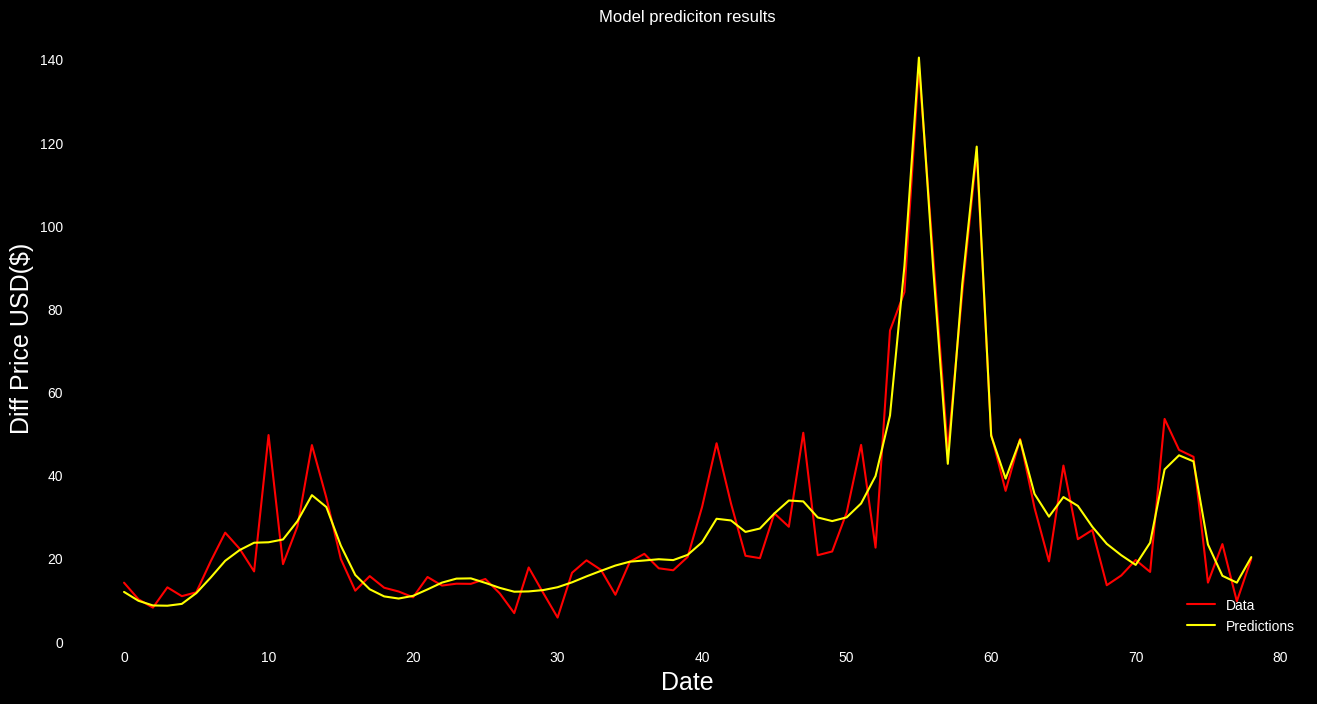

In [38]:

# valid['pred'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))

plt.title('Model prediciton results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Diff Price USD($)', fontsize=18)
plt.plot(y_test[1]['diff'] , color='red')
plt.plot(predictions[1]['diff'], color='yellow')
plt.legend(['Data', 'Predictions'], loc='lower right')
# plt.savefig('/content/prediction.png')
plt.show()

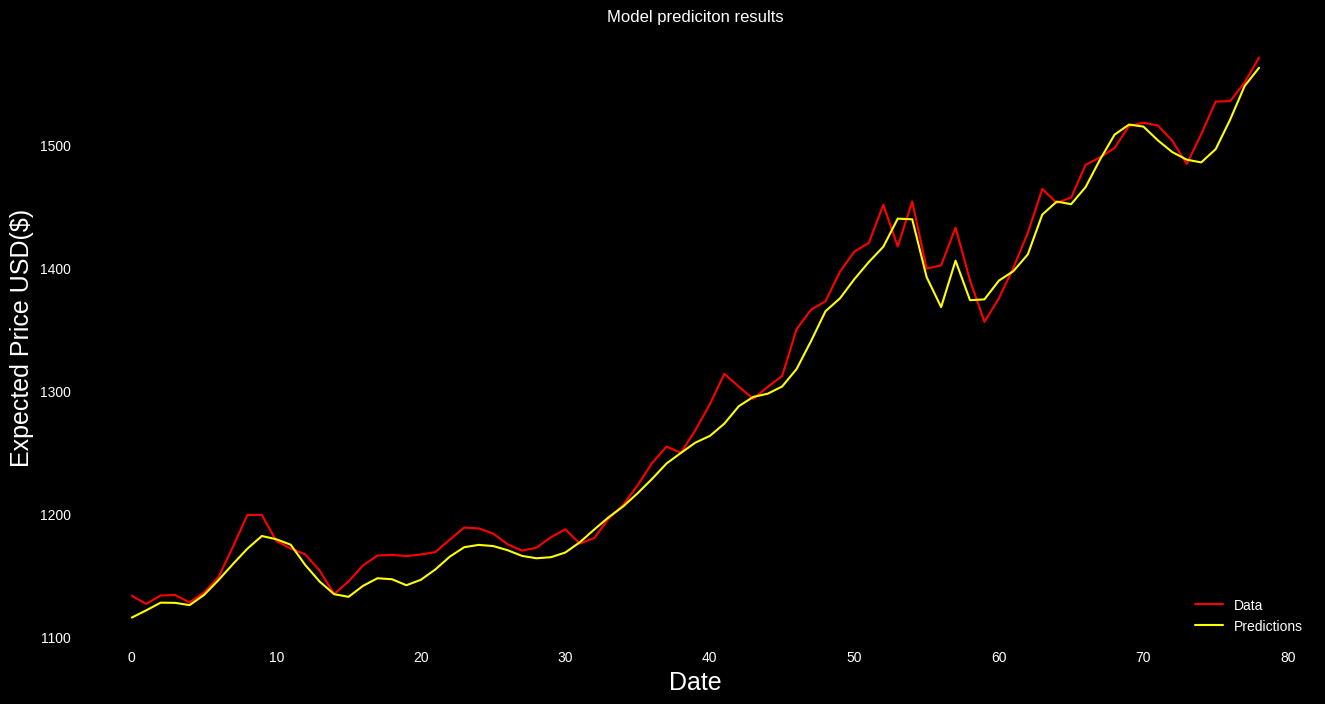

In [39]:
# valid['pred'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))

plt.title('Model prediciton results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Expected Price USD($)', fontsize=18)
plt.plot(y_test[1]['exp'], color='red')
plt.plot(predictions[1]['exp'], color='yellow')
plt.legend(['Data', 'Predictions'], loc='lower right')
# plt.savefig('/content/prediction.png')
plt.show()